# EXP 10: Build an Artificial Neural Network (ANN) by implementing backpropogation algorithm and test the same using appropriate dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#df = np.genfromtxt("C:\\Users\honey\Desktop\Class time\ML\data_banknote_authentication.txt",delimiter=",", unpack=True)

In [3]:
#df

In [4]:
df2 = np.genfromtxt("C:\\Users\honey\Desktop\Class time\ML\data_banknote_authentication.txt",delimiter=",")

In [5]:
df2

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [6]:
# df3 = np.genfromtxt("C:\\Users\honey\Desktop\Class time\ML\data_banknote_authentication.txt")

In [7]:
#df3

In [8]:
x = df2[:,:4]
y = df2[:, 4]

In [9]:
x

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [10]:
y

array([0., 0., 0., ..., 1., 1., 1.])

Text(0, 0.5, 'skewness of wavelet')

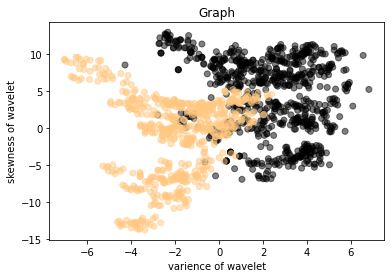

In [11]:
plt.figure(figsize=(6,4))

plt.scatter(x[:, 0], x[:, 1], alpha=0.5, c=y, cmap='copper')

plt.title("Graph")
plt.xlabel('varience of wavelet')
plt.ylabel('skewness of wavelet')

In [12]:
x_train, x_test, y_train, y_test, = train_test_split(x,y,test_size=0.2, random_state=150)

In [13]:
x_train = x_train.T #.T method gives the transpose of the i/p matrix we give
x=test = x_test.T

y_train = y_train.reshape(1, y_train.shape[0])
y_test = y_test.reshape(1, y_test.shape[0])

In [14]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(4, 1097)
(1, 1097)
(275, 4)
(1, 275)


In [15]:
def structure (x, y):
    input_unit = x.shape[0]
    hidden_unit = 4
    output_unit = y.shape[0]
    
    return (input_unit, hidden_unit, output_unit)

(input_unit, hidden_unit, output_unit) = structure(x_train, y_train)

In [16]:
print("The size of i/p layer: ",input_unit)
print("The size of hidden layer: ",hidden_unit)
print("The size of output layer: ",output_unit)

The size of i/p layer:  4
The size of hidden layer:  4
The size of output layer:  1


In [17]:
def parameters_initialization(input_unit, hidden_unit, output_unit):
    np.random.seed(2)
    w1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    w2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1))
    parameters = {"w1": w1,
                 "b1" : b1,
                 "w2" : w2,
                 "b2" : b2}
    return parameters

In [18]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def forward_propogation(x, parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1,x)+b1
    a1 = np.tanh(z1)
    z2 = np.dot(w2,a1)+b2
    a2 = sigmoid(z2)
    cache = {"z1" : z1, "a1" : a1, "z2" : z2, "a2" : a2}
    
    return a2, cache

In [19]:
def cross_entropy_cost(a2, y, parameters):
    #here we take the no. of training examples
    m = y.shape[1]
    # compute the cross-entropy cost
    logprobs = np.multiply(np.log(a2), y) + np.multiply((1-y), np.log(1-a2))
    cost = -np.sum(logprobs)/m
    cost = float(np.squeeze(cost))
    
    return cost

In [20]:
def backward_propogation(parameters, cache, x, y):
    m = x.shape[1]
    
    w1 = parameters ['w1']
    w2 = parameters['w2']
    a1 = cache['a1']
    a2 = cache['a2']
    
    dz2 = a2-y
    dw2 = (1/m) * np.dot(dz2, a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.multiply(np.dot(w2.T, dz2), 1-np.power(a1, 2))
    dw1 = (1/m) * np.dot(dz1, x.T)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    
    grads = {"dw1" : dw1, "db1" : db1, "dw2" : dw2, "db2" : db2}
    
    return grads

In [21]:
def gradient_descent(parameters, grads, learning_rate = 0.01):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = grads['dw1']
    db1 = grads['db1']
    dw2 = grads['dw2']
    db2 = grads['db2']
    
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    
    parameters = {"w1" : w1, "b1" : b1, "w2" : w2, "b2" : b2}
    
    return parameters

In [22]:
def neural_network_model(x, y, hidden_unit, num_iterations = 1000):
    np.random.seed(3)
    input_unit = structure(x,y)[0]
    output_unit = structure(x,y)[2]
    
    parameters = parameters_initialization(input_unit, hidden_unit, output_unit)
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        a2, cache = forward_propogation(x, parameters)
        cost = cross_entropy_cost(a2, y, parameters)
        grads = backward_propogation(parameters, cache, x, y)
        parameters = gradient_descent(parameters, grads)
        print("cost after iteration %i: %f" %(i, cost))
        
    return parameters
    
parameters = neural_network_model(x_train, y_train, 4, num_iterations=1000) 

cost after iteration 0: 0.692982
cost after iteration 1: 0.692910
cost after iteration 2: 0.692838
cost after iteration 3: 0.692766
cost after iteration 4: 0.692695
cost after iteration 5: 0.692623
cost after iteration 6: 0.692551
cost after iteration 7: 0.692479
cost after iteration 8: 0.692407
cost after iteration 9: 0.692334
cost after iteration 10: 0.692262
cost after iteration 11: 0.692189
cost after iteration 12: 0.692116
cost after iteration 13: 0.692042
cost after iteration 14: 0.691968
cost after iteration 15: 0.691894
cost after iteration 16: 0.691819
cost after iteration 17: 0.691744
cost after iteration 18: 0.691668
cost after iteration 19: 0.691592
cost after iteration 20: 0.691515
cost after iteration 21: 0.691437
cost after iteration 22: 0.691359
cost after iteration 23: 0.691280
cost after iteration 24: 0.691201
cost after iteration 25: 0.691120
cost after iteration 26: 0.691039
cost after iteration 27: 0.690957
cost after iteration 28: 0.690874
cost after iteration 29:

cost after iteration 325: 0.462239
cost after iteration 326: 0.460898
cost after iteration 327: 0.459559
cost after iteration 328: 0.458222
cost after iteration 329: 0.456887
cost after iteration 330: 0.455553
cost after iteration 331: 0.454222
cost after iteration 332: 0.452893
cost after iteration 333: 0.451565
cost after iteration 334: 0.450240
cost after iteration 335: 0.448917
cost after iteration 336: 0.447596
cost after iteration 337: 0.446278
cost after iteration 338: 0.444962
cost after iteration 339: 0.443648
cost after iteration 340: 0.442337
cost after iteration 341: 0.441029
cost after iteration 342: 0.439723
cost after iteration 343: 0.438420
cost after iteration 344: 0.437119
cost after iteration 345: 0.435821
cost after iteration 346: 0.434526
cost after iteration 347: 0.433234
cost after iteration 348: 0.431944
cost after iteration 349: 0.430658
cost after iteration 350: 0.429374
cost after iteration 351: 0.428094
cost after iteration 352: 0.426817
cost after iteration

cost after iteration 606: 0.216616
cost after iteration 607: 0.216142
cost after iteration 608: 0.215670
cost after iteration 609: 0.215200
cost after iteration 610: 0.214731
cost after iteration 611: 0.214265
cost after iteration 612: 0.213800
cost after iteration 613: 0.213336
cost after iteration 614: 0.212875
cost after iteration 615: 0.212415
cost after iteration 616: 0.211957
cost after iteration 617: 0.211501
cost after iteration 618: 0.211046
cost after iteration 619: 0.210593
cost after iteration 620: 0.210142
cost after iteration 621: 0.209693
cost after iteration 622: 0.209245
cost after iteration 623: 0.208799
cost after iteration 624: 0.208354
cost after iteration 625: 0.207911
cost after iteration 626: 0.207470
cost after iteration 627: 0.207030
cost after iteration 628: 0.206593
cost after iteration 629: 0.206156
cost after iteration 630: 0.205722
cost after iteration 631: 0.205288
cost after iteration 632: 0.204857
cost after iteration 633: 0.204427
cost after iteration

cost after iteration 880: 0.132229
cost after iteration 881: 0.132032
cost after iteration 882: 0.131836
cost after iteration 883: 0.131641
cost after iteration 884: 0.131445
cost after iteration 885: 0.131251
cost after iteration 886: 0.131057
cost after iteration 887: 0.130863
cost after iteration 888: 0.130670
cost after iteration 889: 0.130478
cost after iteration 890: 0.130286
cost after iteration 891: 0.130095
cost after iteration 892: 0.129904
cost after iteration 893: 0.129713
cost after iteration 894: 0.129523
cost after iteration 895: 0.129334
cost after iteration 896: 0.129145
cost after iteration 897: 0.128957
cost after iteration 898: 0.128769
cost after iteration 899: 0.128582
cost after iteration 900: 0.128395
cost after iteration 901: 0.128208
cost after iteration 902: 0.128022
cost after iteration 903: 0.127837
cost after iteration 904: 0.127652
cost after iteration 905: 0.127468
cost after iteration 906: 0.127284
cost after iteration 907: 0.127100
cost after iteration

In [23]:
def prediction(parameters, x):
    a2, cache = forward_propogation(x, parameters)
    predictions = np.round(a2)
    
    return predictions

In [24]:
predictions = prediction(parameters, x_train)
print("Accuracy of Training: %d " %float ((np.dot(y_train, predictions.T) + np.dot(1-y_train, 1-predictions.T))/ float(y_train.size)*100) + '%')

Accuracy of Training: 98 %


In [25]:
predictions = prediction(parameters, x_test)
print("Accuracy of Testing: %d" % float((np.dot(y_test, predictions.T) + np.dot(1-y_test, 1-predictions.T))/ float(y_test.size)*100) + '%')

ValueError: shapes (4,4) and (275,4) not aligned: 4 (dim 1) != 275 (dim 0)